In [1]:
import numpy as np
import matplotlib.pyplot as plt

import utils

H_ONLY='../nlunetwork/results/tuning/optimized/h_only/conf_4/huric/modern_right/'
FN_FT='../nlunetwork/results/tuning/optimized/fn_only_hyper_h/huric/modern_right/'
FN_LU='../nlunetwork/results/tuning/optimized/fn_lu_only_hyper_h/huric/modern_right/'
H_FN_FT='../nlunetwork/results/tuning/optimized/h_and_fn_ft/conf_4/huric/with_framenet_ft/'
H_FN_LU='../nlunetwork/results/tuning/optimized/h_and_fn_lu/conf_4/huric/with_framenet_lu/'

samples_h = utils.load_json(H_ONLY,16)
samples_fn_ft = utils.load_json(FN_FT, 0)
samples_fn_lu = utils.load_json(FN_LU, 0)
samples_h_fn_ft = utils.load_json(H_FN_FT,48)
samples_h_fn_lu = utils.load_json(H_FN_LU,25)

# also the XML stuff
HURIC_LOCATION = '../data/huric/modern/source'
gold_missing = utils.get_samples_pos_and_lemmas_and_deps(HURIC_LOCATION)

In [2]:
print('samples_h', utils.get_attention_scores(samples_h, gold_missing))
print('samples_fn_ft', utils.get_attention_scores(samples_fn_ft, gold_missing))
print('samples_fn_lu', utils.get_attention_scores(samples_fn_lu, gold_missing))
print('samples_h_fn_ft', utils.get_attention_scores(samples_h_fn_ft, gold_missing))
print('samples_h_fn_lu', utils.get_attention_scores(samples_h_fn_lu, gold_missing))


samples_h {'ad': {'argmax': 0.0636998254799302, 'average': 0.06666441640112952}, 'ad_more': {'argmax': 0.14616055846422338, 'average': 0.16198983686659482}, 'ai': {'first_word_of_span_average': 0.4009082046609275, 'first_word_of_span_argmax': 0.42986981342244496, 'lexical_unit_average': 0.2671982474402903, 'lexical_unit_argmax': 0.30184372969460677, 'nouns_average': 0.1141823735116757, 'nouns_argmax': 0.13727238621244464}, 'ac': {'first_word_of_span_average': 0.13178006370861572, 'first_word_of_span_argmax': 0.08256172839506172, 'lexical_unit_average': 0.14608587902718712, 'lexical_unit_argmax': 0.13399354868653113, 'nouns_average': 0.14156582403408466, 'nouns_argmax': 0.02962672885918498}}
samples_fn_ft {'ad': {'argmax': 0.81239092495637, 'average': 0.7843535968729153}, 'ad_more': {'argmax': 0.7300756253635834, 'average': 0.7871868741039088}, 'ai': {'first_word_of_span_average': 0.10413457419867284, 'first_word_of_span_argmax': 0.051981806367771284, 'lexical_unit_average': 0.235730396

In [3]:
xml_docs = utils.load_xmls(HURIC_LOCATION)
invokers = utils.get_lemma_invoker(xml_docs)
# ambiguous verbs invoking multiple frames
for lemma, invocations in invokers.items():
    if len(invocations) > 1:
        print(lemma)#, {k: v for k, v in invocations.items()})

be
move
put
get
take
come
open
look


In [4]:
# see how the attention evolves with epochs
x = list(range(0,50))
cool_h = [utils.load_json(H_ONLY,i) for i in x]
scores_h = [utils.get_attention_scores(el, gold_missing) for el in cool_h]
cool_h_fn = [utils.load_json(H_FN_LU,i) for i in x]
scores_h_fn = [utils.get_attention_scores(el, gold_missing) for el in cool_h_fn]
cool_h_fn_ft = [utils.load_json(H_FN_FT,i) for i in x]
scores_h_fn_ft = [utils.get_attention_scores(el, gold_missing) for el in cool_h_fn_ft]

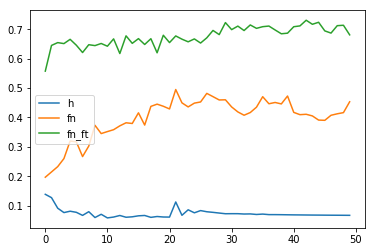

In [5]:
plt.plot(x, [s['ad']['average'] for s in scores_h], label='h')
plt.plot(x, [s['ad']['average'] for s in scores_h_fn], label='fn')
plt.plot(x, [s['ad']['average'] for s in scores_h_fn_ft], label='fn_ft')
plt.legend()
plt.show()